In [138]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet.plot import plot_plotly, plot_components_plotly


In [139]:
import warnings
warnings.filterwarnings("ignore")

In [140]:
# Load data
df1 = pd.read_csv('Transactional_data_retail_01.csv')
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format='%d %B %Y')
df2 = pd.read_csv('Transactional_data_retail_02.csv')
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format='%d-%m-%Y')
df = pd.concat([df1, df2])


In [141]:
df.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01


In [142]:
df.shape

(1067371, 6)

In [143]:
# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['Price']


In [144]:

# Group and aggregate data
df_grouped = df.groupby(['StockCode', 'InvoiceDate']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()


In [145]:




# Identify top 10 products by quantity sold and revenue
top_products_by_quantity = df_grouped.groupby('StockCode')['Quantity'].sum().nlargest(10).index
top_products_by_revenue = df_grouped.groupby('StockCode')['Revenue'].sum().nlargest(10).index


In [146]:

# Filter to get the top products data
top_products = df_grouped[df_grouped['StockCode'].isin(top_products_by_quantity)]


In [147]:
top_products

,StockCode,InvoiceDate,Quantity,Revenue
9236,17003,2021-12-01,144,30.24
9237,17003,2021-12-02,38,7.98
9238,17003,2021-12-04,1,0.43
9239,17003,2021-12-07,2,0.86
9240,17003,2021-12-08,72,15.12
...,...,...,...,...
517610,85123A,2023-12-05,298,788.06
517611,85123A,2023-12-06,38,112.10
517612,85123A,2023-12-07,200,538.80
517613,85123A,2023-12-08,108,307.20


In [148]:

# 4. Apply Prophet Forecasting
def apply_prophet(df, product_code):
    product_data = df[df['StockCode'] == product_code][['InvoiceDate', 'Quantity']]
    product_data.columns = ['ds', 'y']

    model_prophet = Prophet()
    model_prophet.fit(product_data)

    future = model_prophet.make_future_dataframe(periods=15)  # Forecast for 15 weeks
    forecast = model_prophet.predict(future)

    model_prophet.plot(forecast)
    plt.title(f'Prophet Forecast for Product {product_code}')
    plt.show()
    return forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/vh_f8_l8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/pk1a4dz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26601', 'data', 'file=/tmp/tmpm489jptj/vh_f8_l8.json', 'init=/tmp/tmpm489jptj/pk1a4dz9.json', 'output', 'file=/tmp/tmpm489jptj/prophet_model6solx7qm/prophet_model-20241007055338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


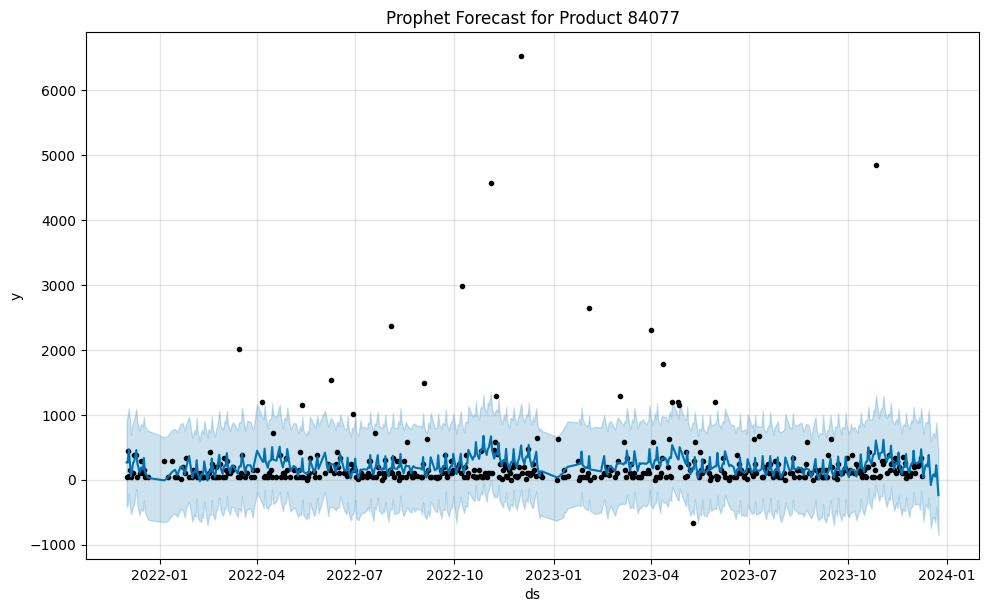

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/sndz2em7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/3ncoizrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50364', 'data', 'file=/tmp/tmpm489jptj/sndz2em7.json', 'init=/tmp/tmpm489jptj/3ncoizrw.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelyibcctyz/prophet_model-20241007055338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


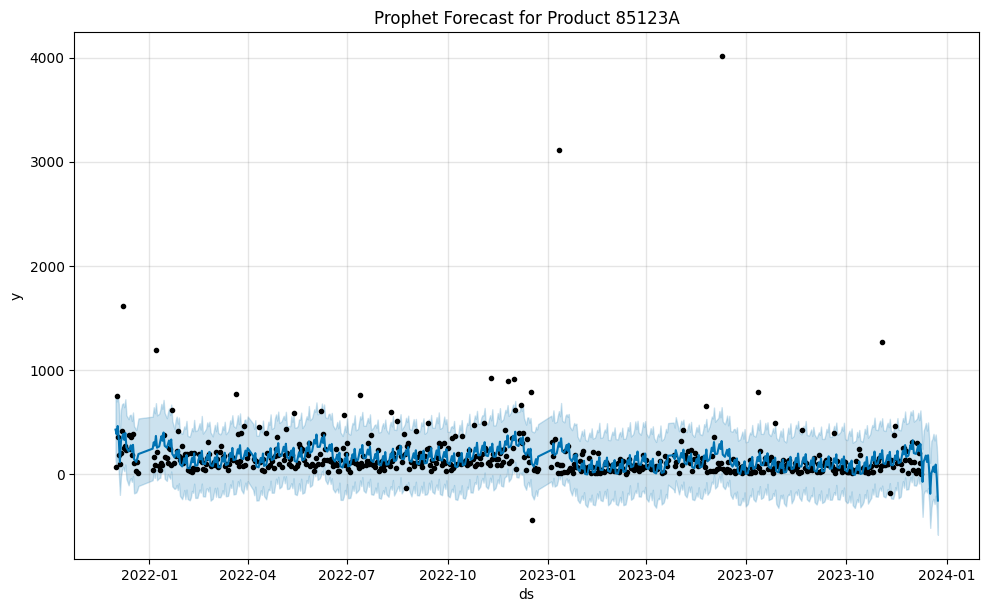

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/nczklmmb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/vodmqrav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48391', 'data', 'file=/tmp/tmpm489jptj/nczklmmb.json', 'init=/tmp/tmpm489jptj/vodmqrav.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelua9tlc1u/prophet_model-20241007055339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


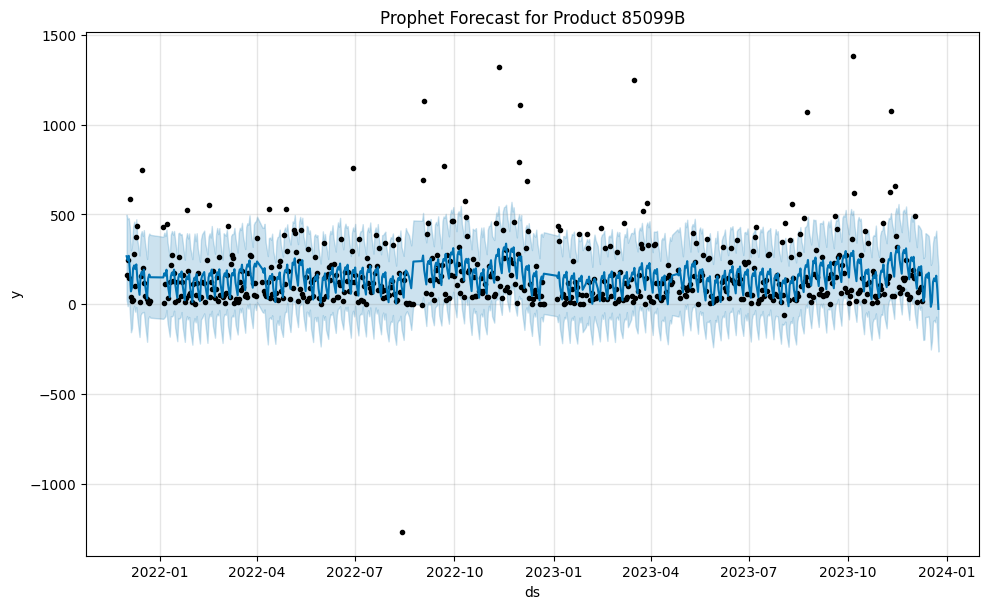

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/oo09hpqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/6ip4xx_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65450', 'data', 'file=/tmp/tmpm489jptj/oo09hpqa.json', 'init=/tmp/tmpm489jptj/6ip4xx_i.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelbgcb5d4k/prophet_model-20241007055340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


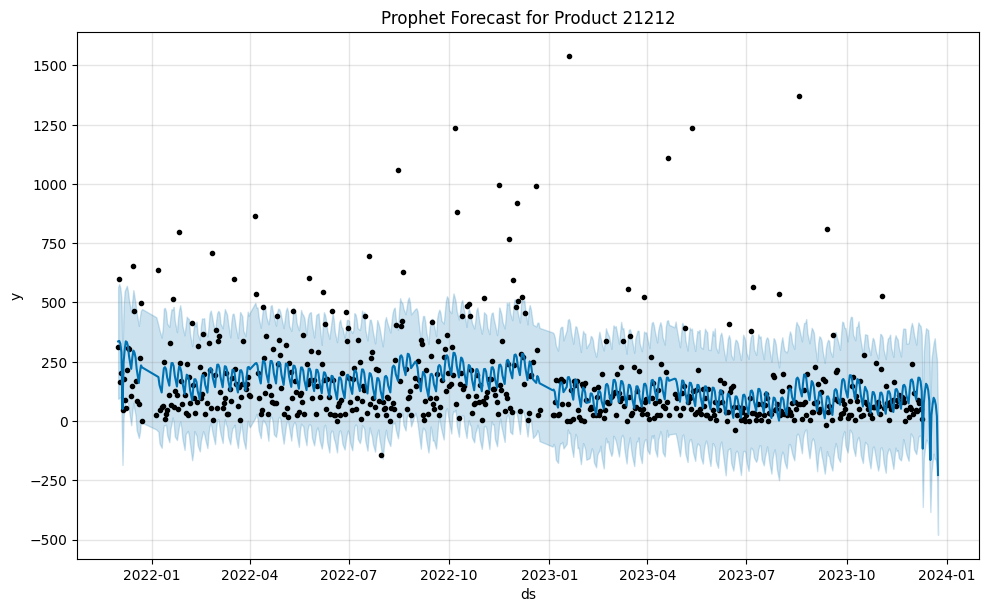

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/oh0ye9yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/5n0ve19x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14161', 'data', 'file=/tmp/tmpm489jptj/oh0ye9yk.json', 'init=/tmp/tmpm489jptj/5n0ve19x.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelpfeh6or_/prophet_model-20241007055341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


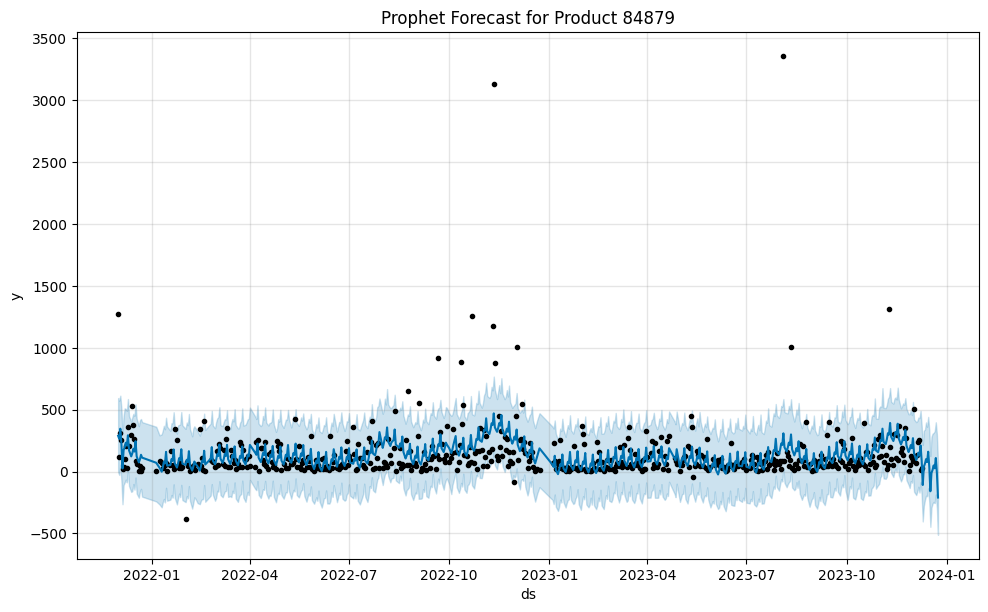

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/yt_ivjs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/lunpa57g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77868', 'data', 'file=/tmp/tmpm489jptj/yt_ivjs6.json', 'init=/tmp/tmpm489jptj/lunpa57g.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modeltwy09zx6/prophet_model-20241007055341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


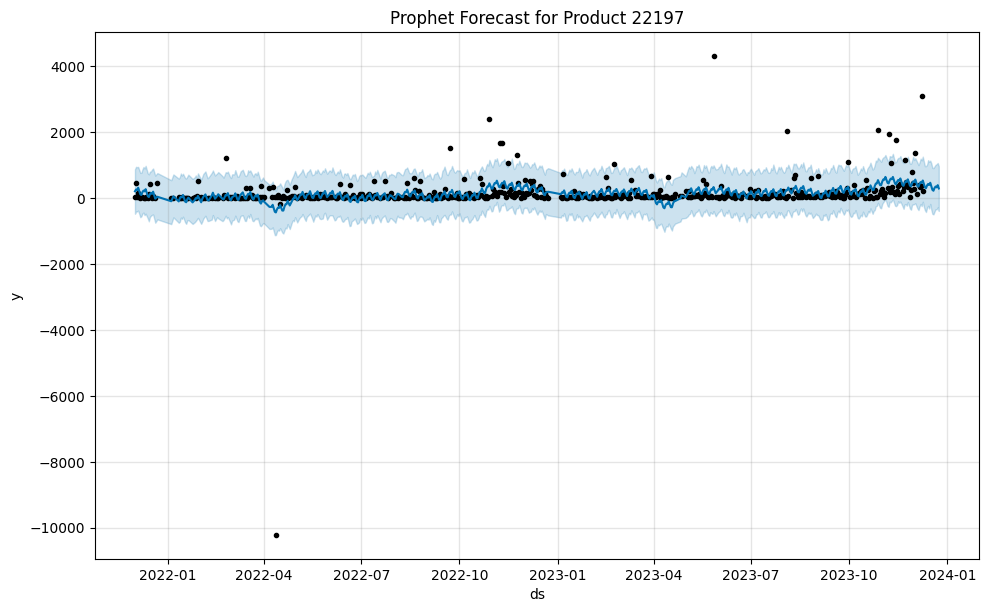

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/9e25edge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/ycr_do0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24309', 'data', 'file=/tmp/tmpm489jptj/9e25edge.json', 'init=/tmp/tmpm489jptj/ycr_do0x.json', 'output', 'file=/tmp/tmpm489jptj/prophet_model1ijrgyko/prophet_model-20241007055342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


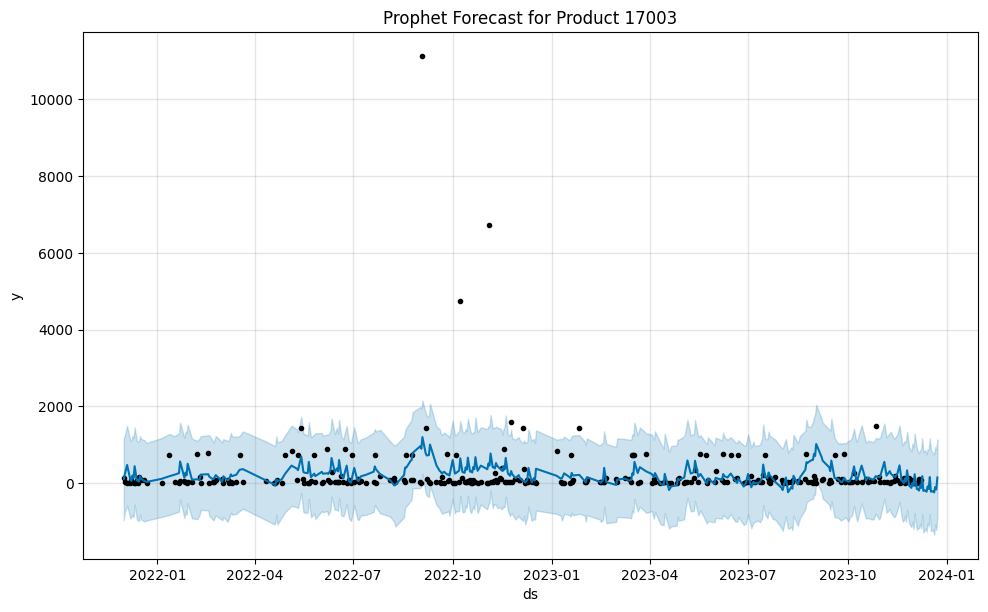

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/ex02jltf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/8th46xtg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=167', 'data', 'file=/tmp/tmpm489jptj/ex02jltf.json', 'init=/tmp/tmpm489jptj/8th46xtg.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modely16ljpw8/prophet_model-20241007055343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


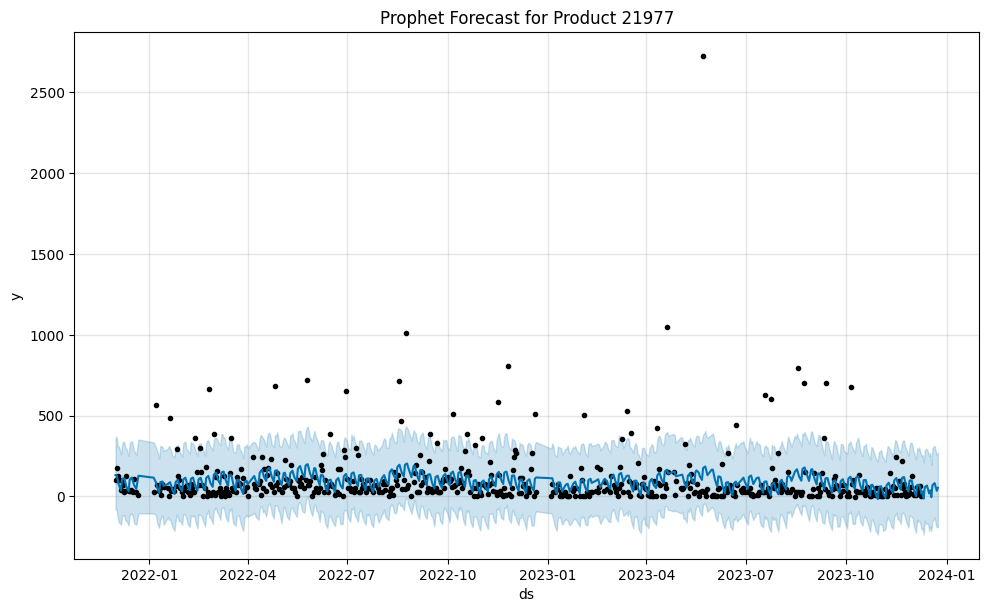

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/rb2uqvxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/iyrde2if.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97780', 'data', 'file=/tmp/tmpm489jptj/rb2uqvxs.json', 'init=/tmp/tmpm489jptj/iyrde2if.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelt9muf615/prophet_model-20241007055344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


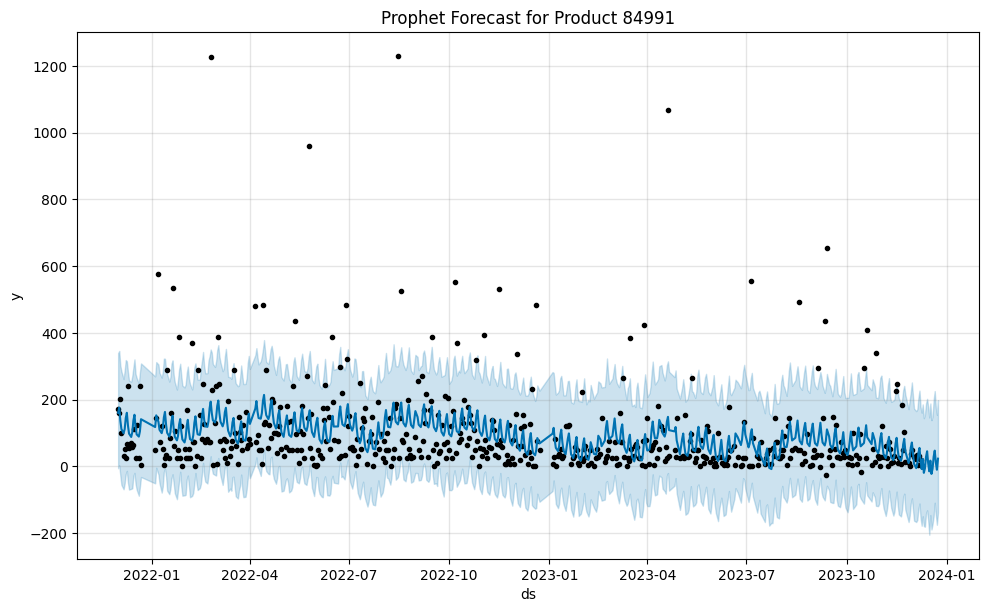

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/kvw98ygb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/y3qg7wmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14105', 'data', 'file=/tmp/tmpm489jptj/kvw98ygb.json', 'init=/tmp/tmpm489jptj/y3qg7wmd.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modeldrdkiceb/prophet_model-20241007055345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


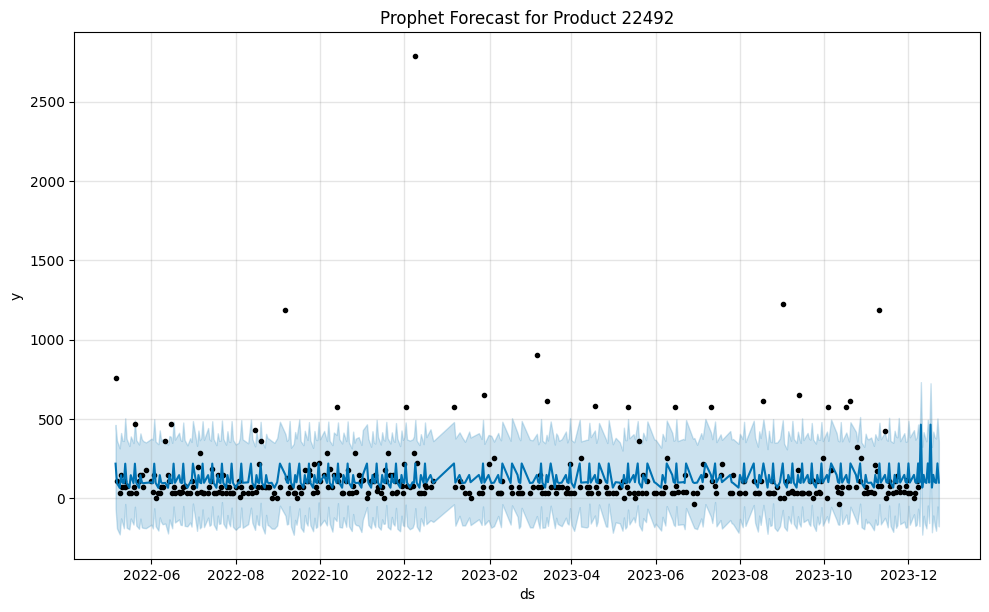

In [149]:


# Forecast using Prophet for top products
for stk in top_products_by_quantity:
    apply_prophet(top_products, stk)


###**Foracasting with the Test and training error of stocks**

In [150]:

# Function to apply Prophet forecasting and plot results
def apply_prophet_and_plot(df, product_code):
    # Prepare product data
    product_data = df[df['StockCode'] == product_code][['InvoiceDate', 'Quantity']]
    product_data.columns = ['ds', 'y']  # Rename columns for Prophet
    product_data.dropna(inplace=True)

    model_prophet = Prophet()
    model_prophet.fit(product_data)

    future = model_prophet.make_future_dataframe(periods=15)  # Forecast for 15 weeks
    forecast = model_prophet.predict(future)

    # Plotting historical and forecast demand
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['ds'], product_data['y'], label='Historical Demand', color='orange')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Demand', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5)
    plt.title(f'Historical and Forecast Demand for Product {product_code}')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid()
    plt.show()

    # Calculate errors
    train_size = len(product_data)
    actual = product_data['y'].values
    predicted = forecast['yhat'].values[:train_size]

    errors = actual - predicted
    test_errors = forecast['yhat'].values[train_size:] - forecast['yhat'].values[train_size:]  # Errors for the forecast period

    print(f'Mean Absolute Error (MAE): {np.mean(np.abs(errors)):.2f}')

    # Plot error histograms
    plt.figure(figsize=(12, 6))

    # Histogram for training errors
    plt.subplot(1, 2, 1)
    plt.hist(errors, bins=20, color='gray', alpha=0.7, edgecolor='black')
    plt.title('Error Distribution (Training Set)')
    plt.xlabel('Error')
    plt.ylabel('Frequency')

    # Histogram for forecast errors
    plt.subplot(1, 2, 2)
    plt.hist(test_errors, bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Error Distribution (Forecast Set)')
    plt.xlabel('Error')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return forecast  # Return forecast data if needed



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/dsbgtxwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/b_jruiz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59387', 'data', 'file=/tmp/tmpm489jptj/dsbgtxwe.json', 'init=/tmp/tmpm489jptj/b_jruiz6.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelupacgpt3/prophet_model-20241007055346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


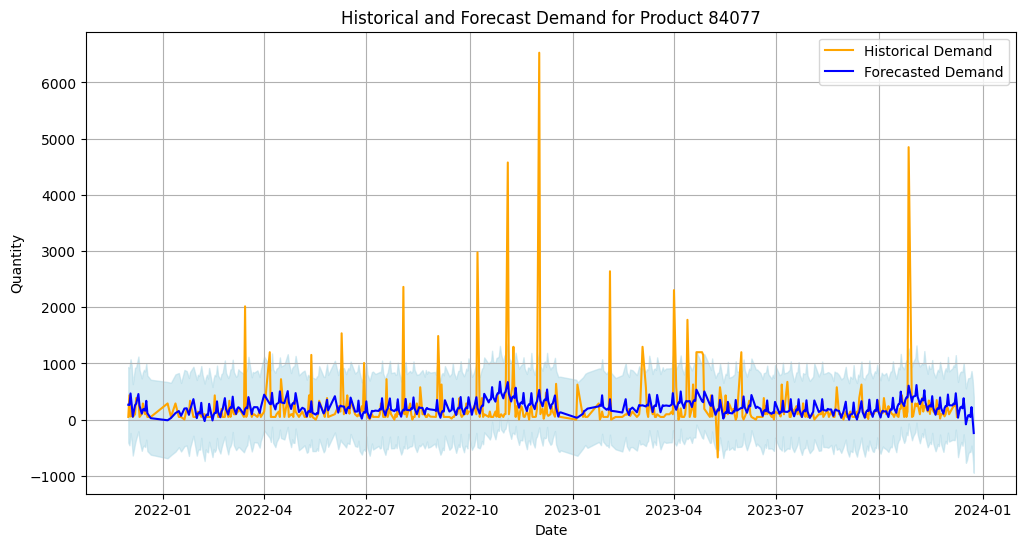

Mean Absolute Error (MAE): 220.77


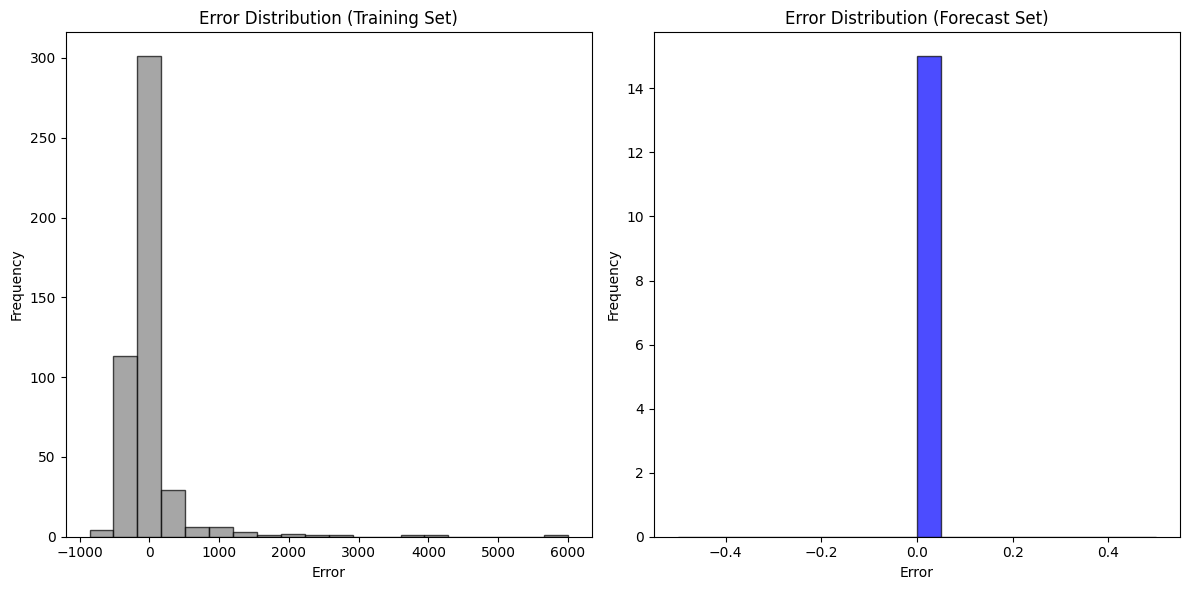

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/mq8trol7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/fie0t4y1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20750', 'data', 'file=/tmp/tmpm489jptj/mq8trol7.json', 'init=/tmp/tmpm489jptj/fie0t4y1.json', 'output', 'file=/tmp/tmpm489jptj/prophet_model7w63swwx/prophet_model-20241007055348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


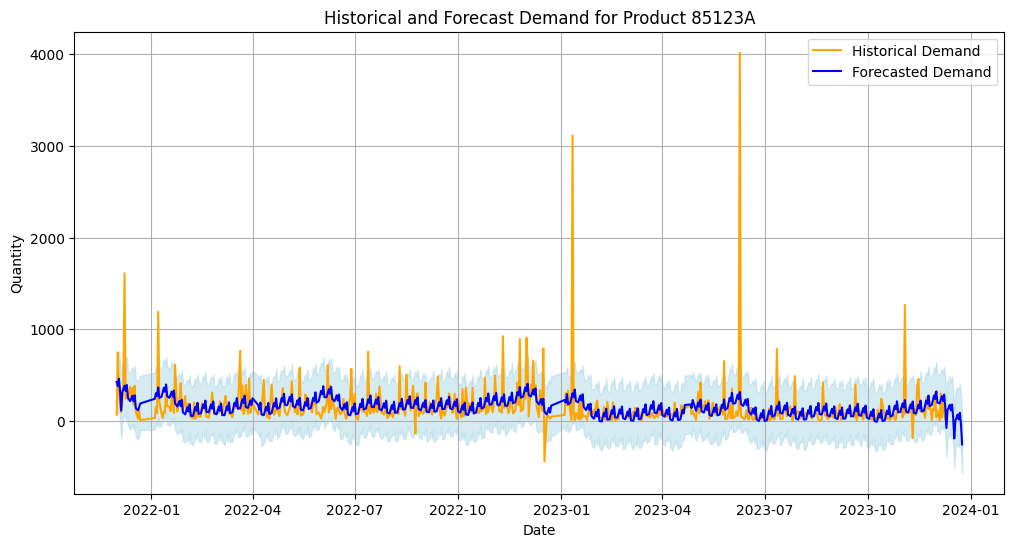

Mean Absolute Error (MAE): 108.84


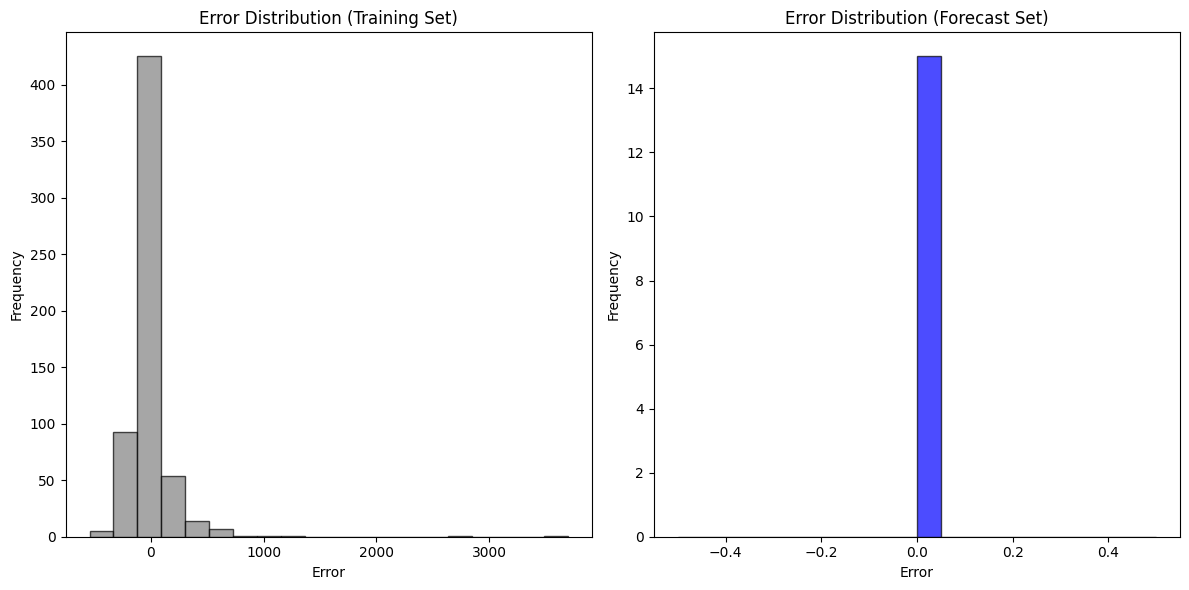

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/djv_exla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/a1hqw2pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12816', 'data', 'file=/tmp/tmpm489jptj/djv_exla.json', 'init=/tmp/tmpm489jptj/a1hqw2pf.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelf9x6jo8t/prophet_model-20241007055350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


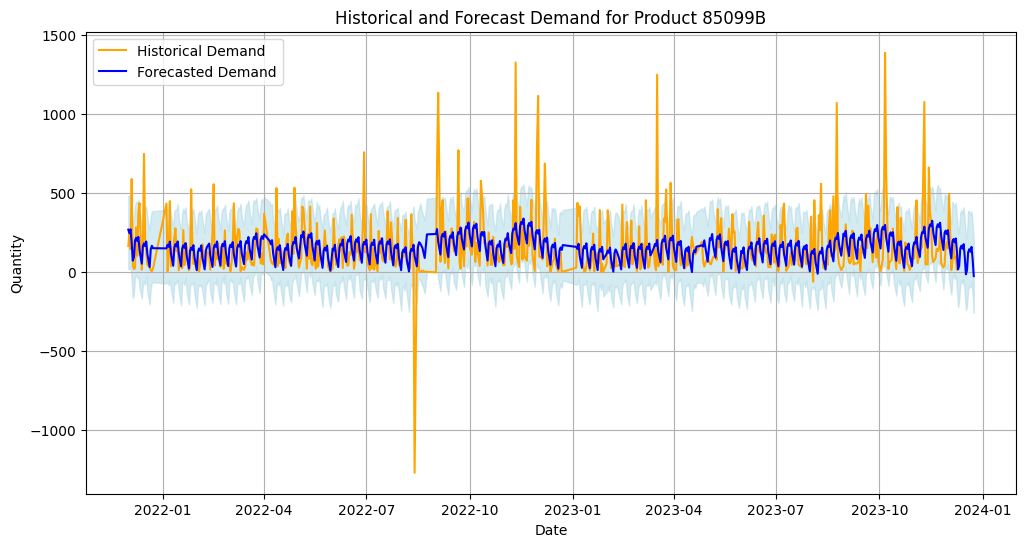

Mean Absolute Error (MAE): 118.01


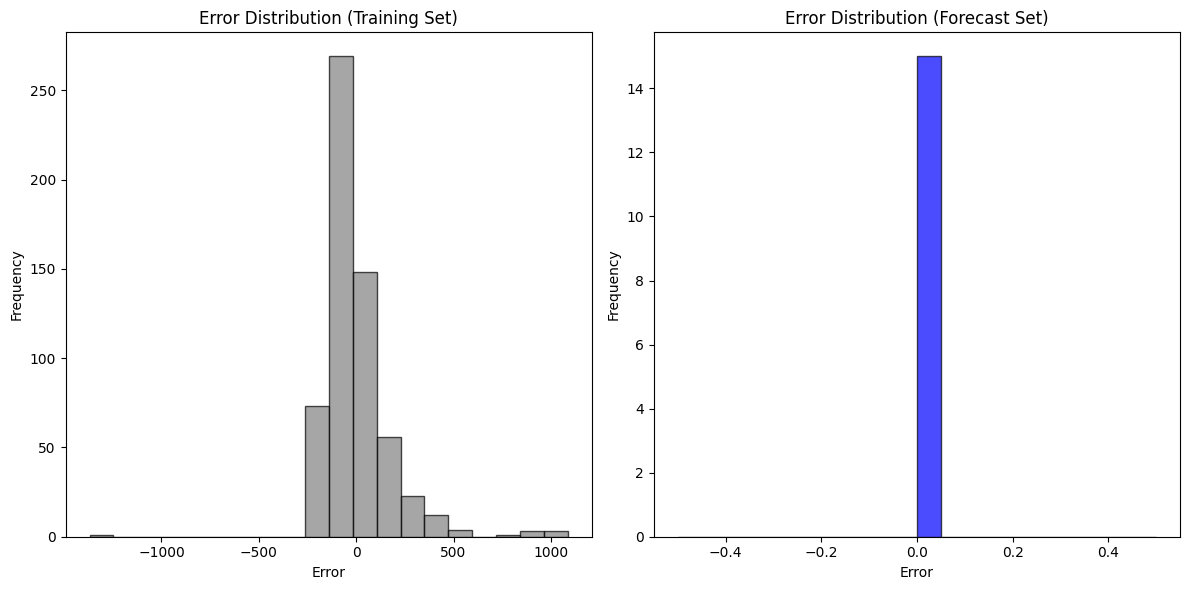

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/safi3yqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/imte6vk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21187', 'data', 'file=/tmp/tmpm489jptj/safi3yqo.json', 'init=/tmp/tmpm489jptj/imte6vk9.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modeltdwvrz2l/prophet_model-20241007055352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


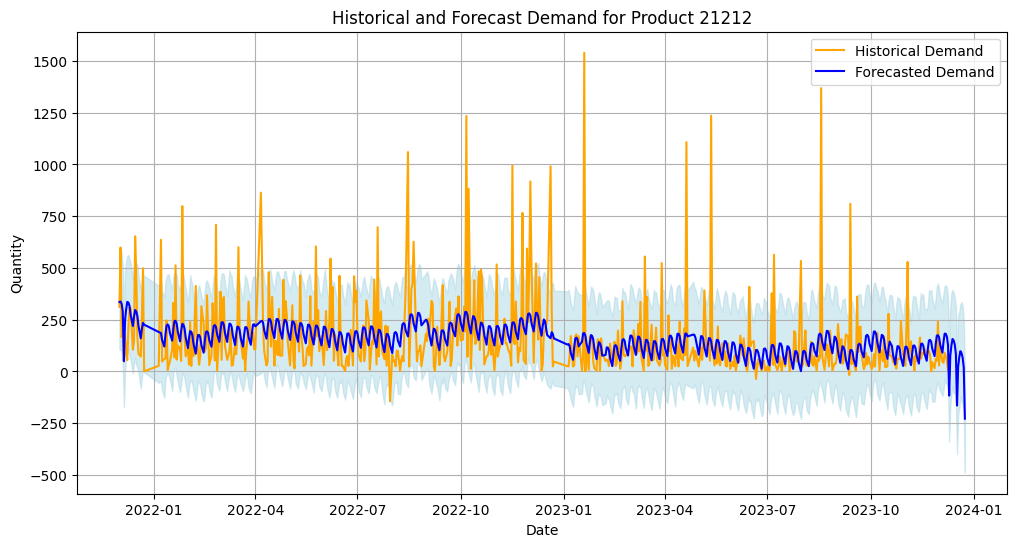

Mean Absolute Error (MAE): 117.40


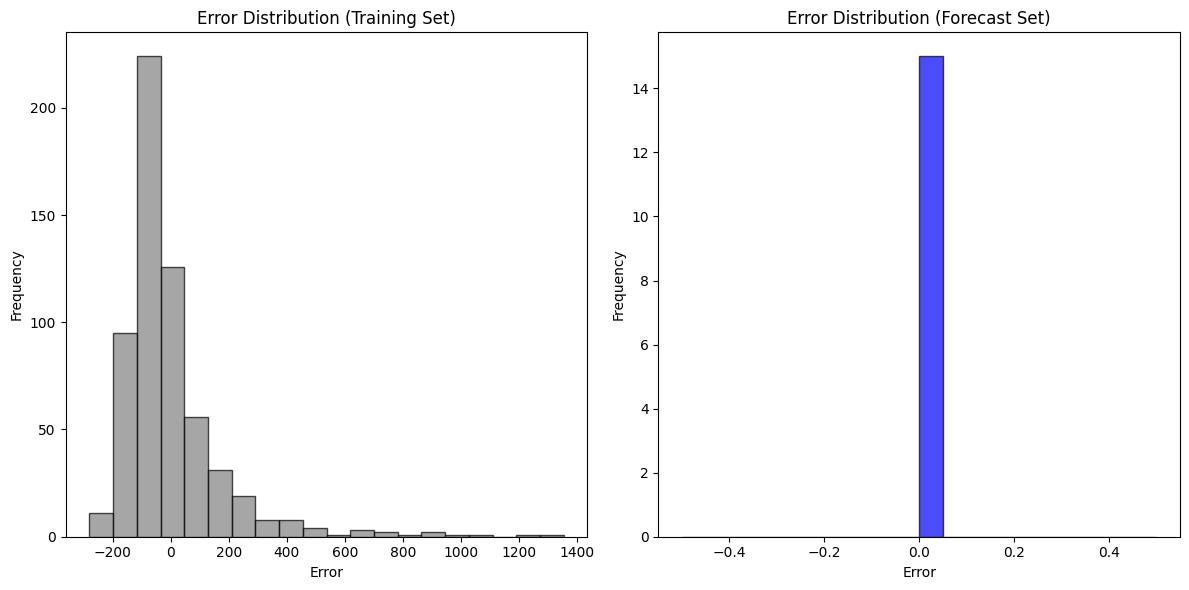

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/wbaaflhs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/7p_yxyig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97499', 'data', 'file=/tmp/tmpm489jptj/wbaaflhs.json', 'init=/tmp/tmpm489jptj/7p_yxyig.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelqiz_qhx3/prophet_model-20241007055353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


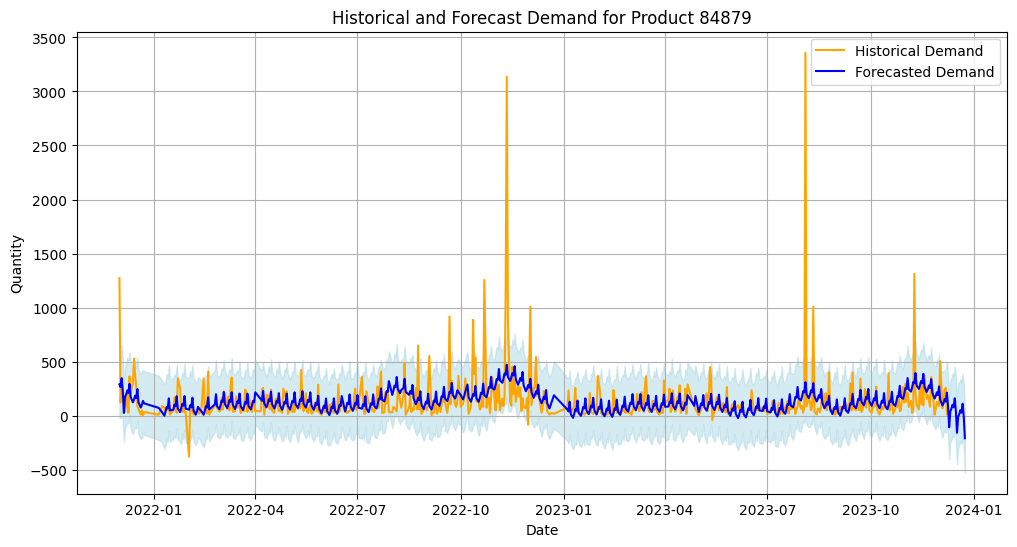

Mean Absolute Error (MAE): 107.34


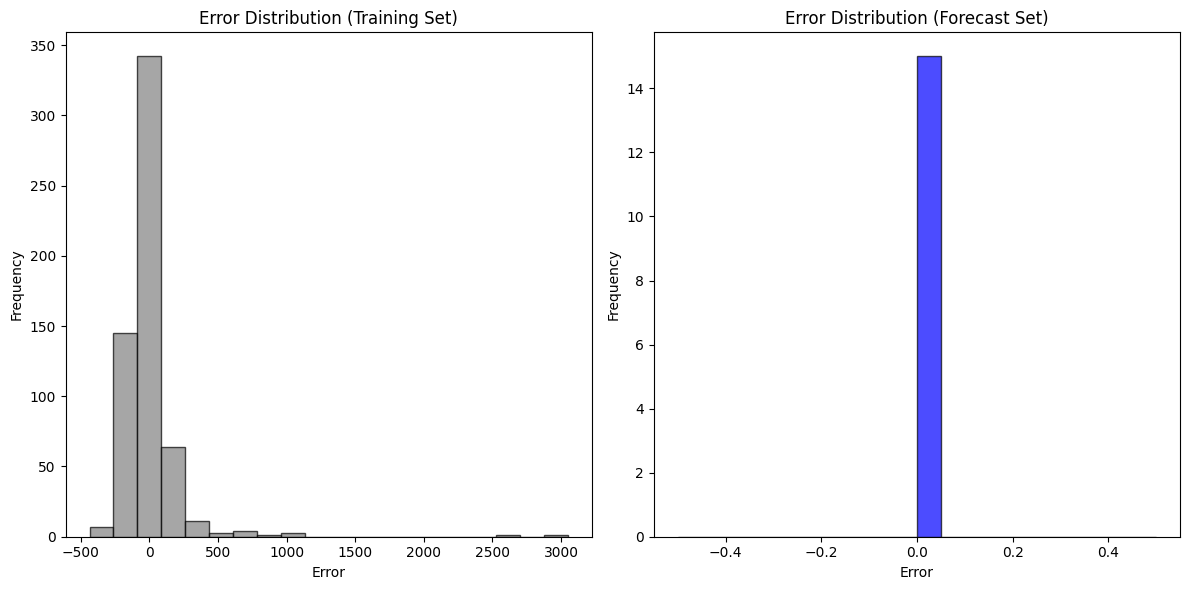

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/n5wvinpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/25_djnm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91786', 'data', 'file=/tmp/tmpm489jptj/n5wvinpg.json', 'init=/tmp/tmpm489jptj/25_djnm7.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelpaz9i1vh/prophet_model-20241007055355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


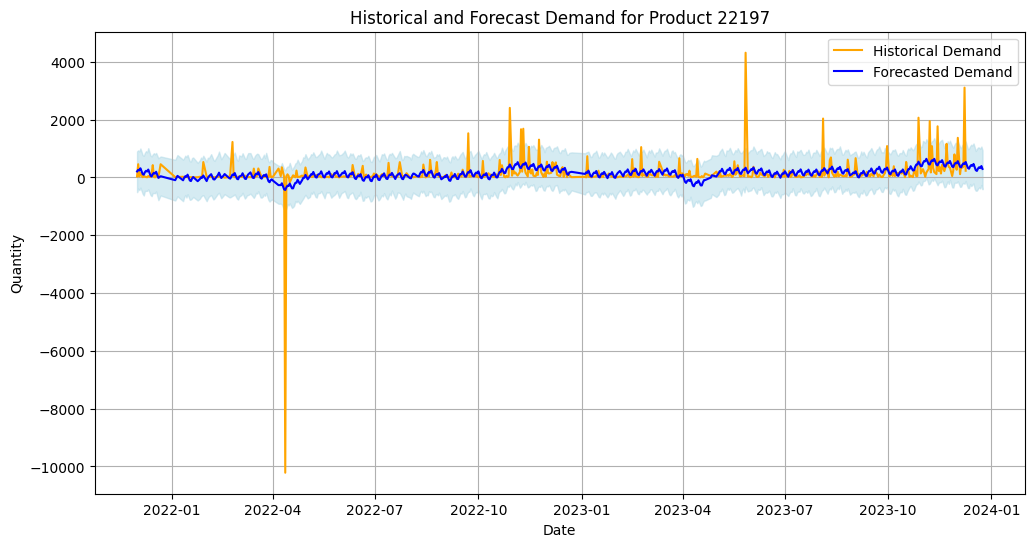

Mean Absolute Error (MAE): 199.41


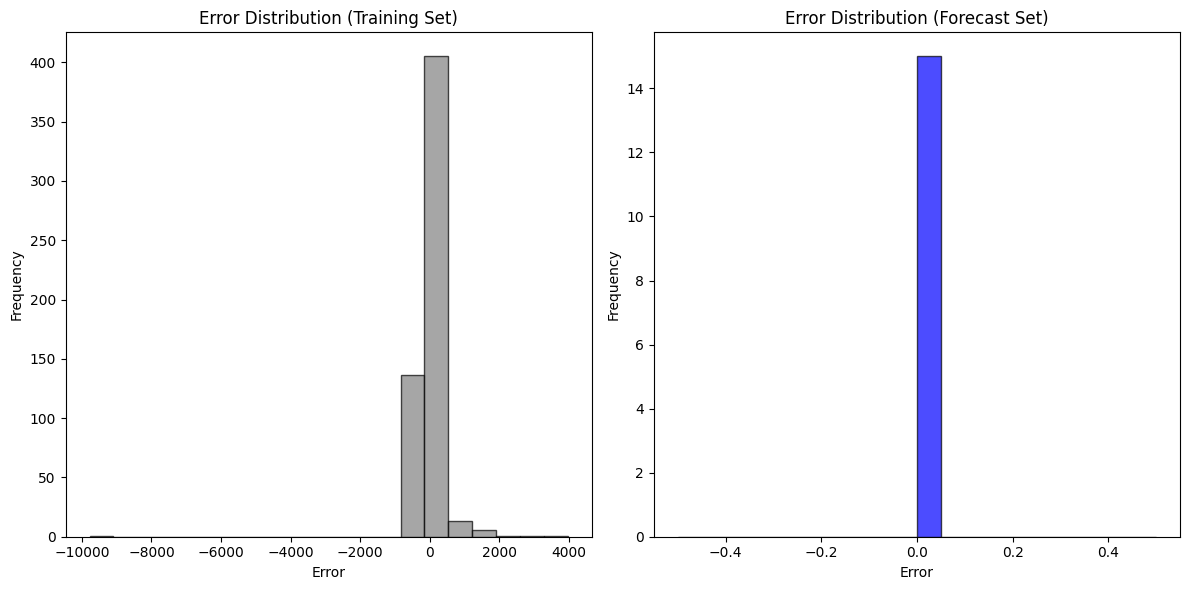

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/d8mpzw9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/x5m216uo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96308', 'data', 'file=/tmp/tmpm489jptj/d8mpzw9j.json', 'init=/tmp/tmpm489jptj/x5m216uo.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelii9u1eiv/prophet_model-20241007055357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


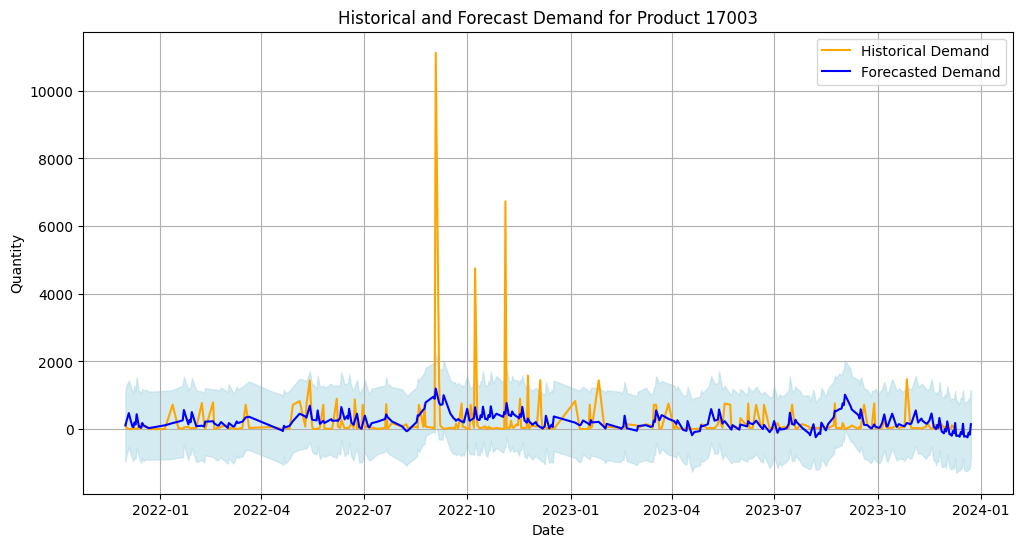

Mean Absolute Error (MAE): 321.68


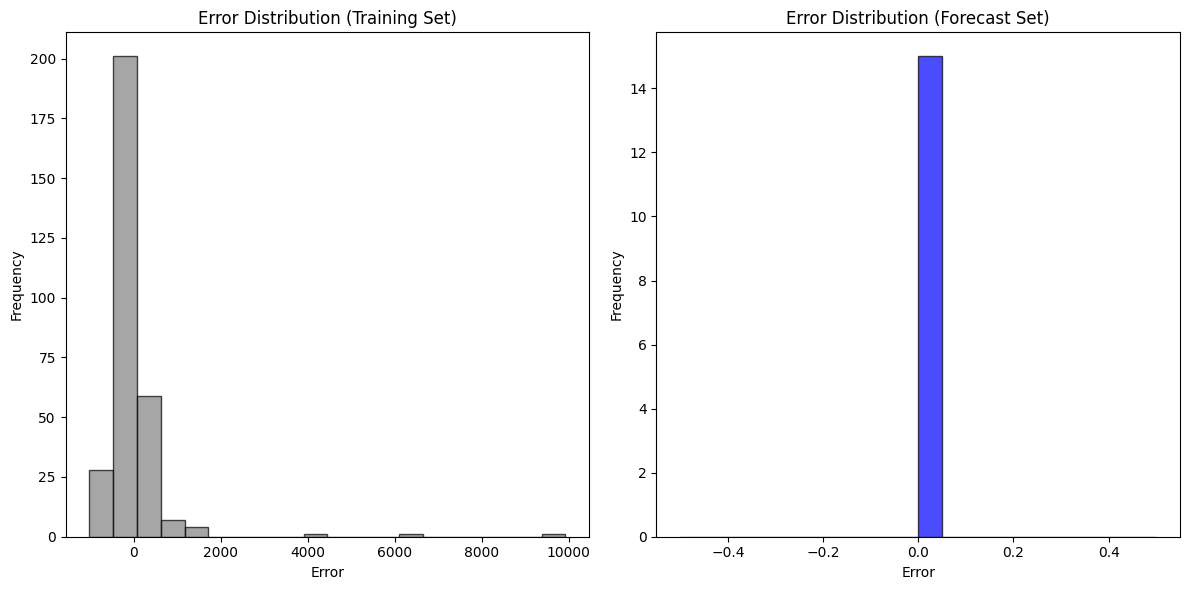

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/t8fwl9gu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/dgfiobga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36379', 'data', 'file=/tmp/tmpm489jptj/t8fwl9gu.json', 'init=/tmp/tmpm489jptj/dgfiobga.json', 'output', 'file=/tmp/tmpm489jptj/prophet_model0cheo259/prophet_model-20241007055359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


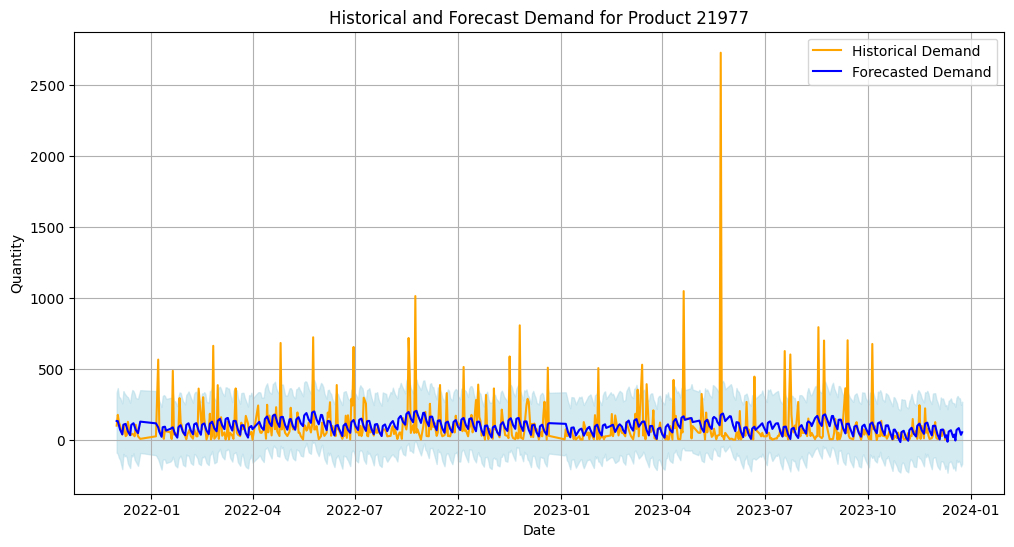

Mean Absolute Error (MAE): 89.10


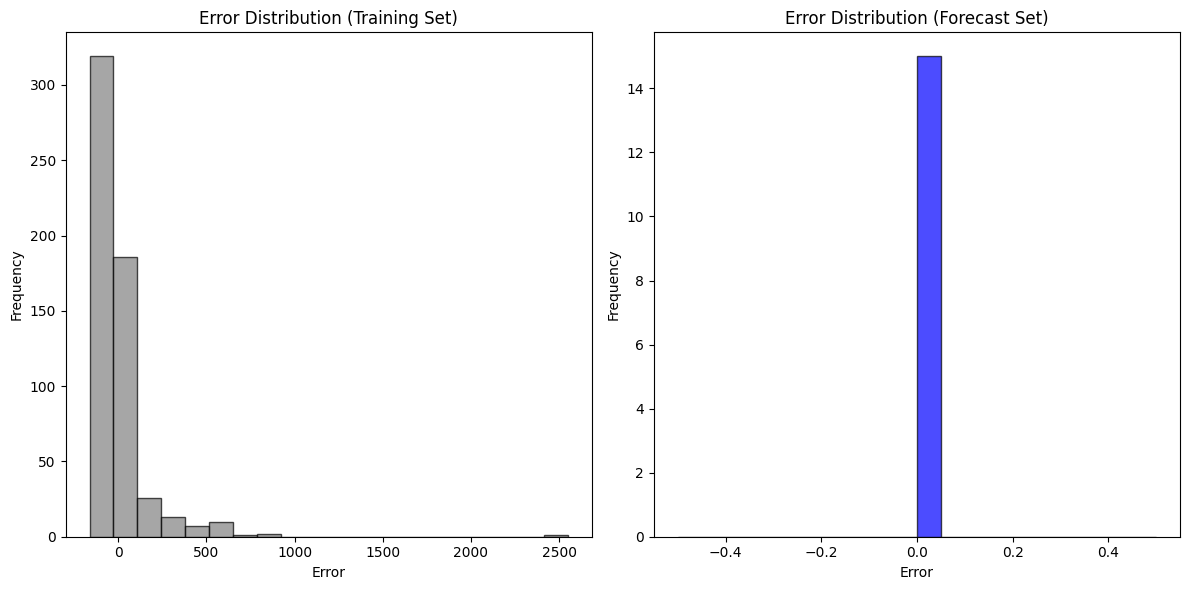

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/hnzxgnne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/xn3e2lyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26365', 'data', 'file=/tmp/tmpm489jptj/hnzxgnne.json', 'init=/tmp/tmpm489jptj/xn3e2lyc.json', 'output', 'file=/tmp/tmpm489jptj/prophet_modelpnwoq1fw/prophet_model-20241007055401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


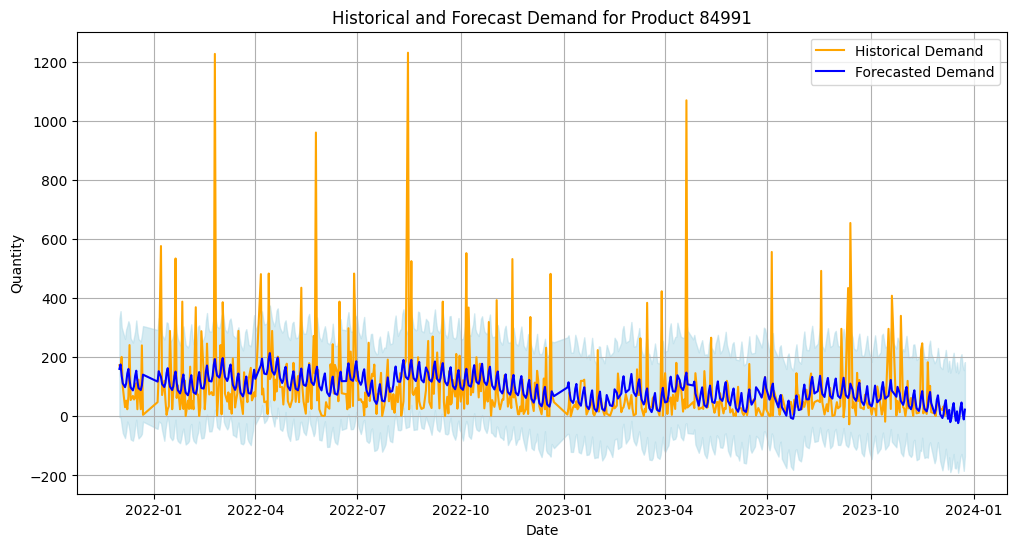

Mean Absolute Error (MAE): 76.33


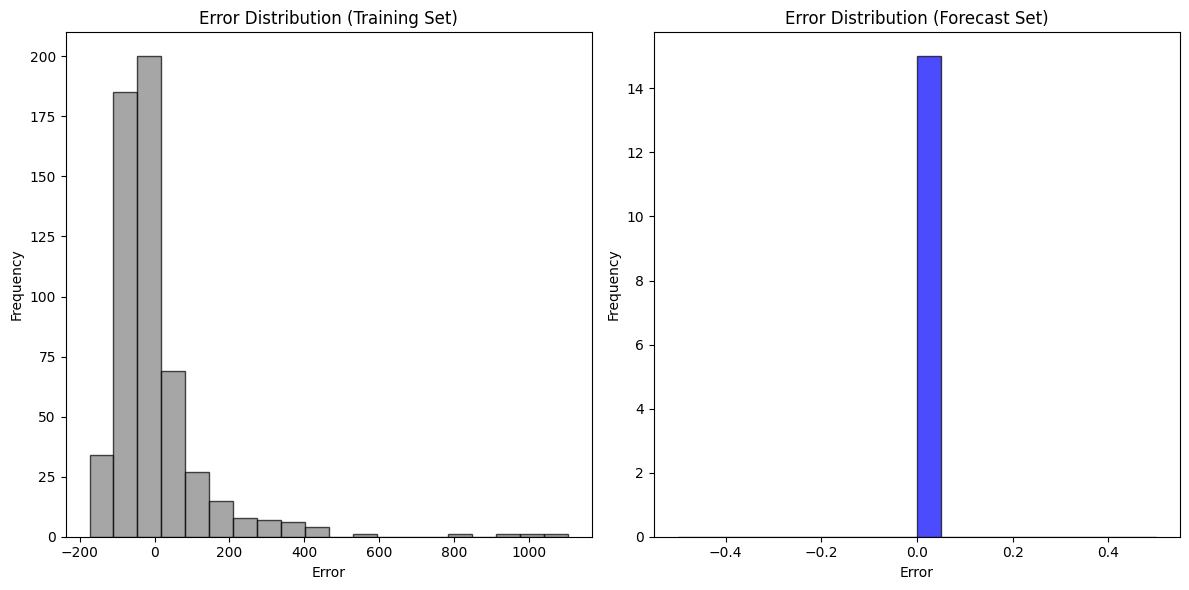

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/eumhoy76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm489jptj/38ij3ugw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75602', 'data', 'file=/tmp/tmpm489jptj/eumhoy76.json', 'init=/tmp/tmpm489jptj/38ij3ugw.json', 'output', 'file=/tmp/tmpm489jptj/prophet_model_y5k3734/prophet_model-20241007055403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


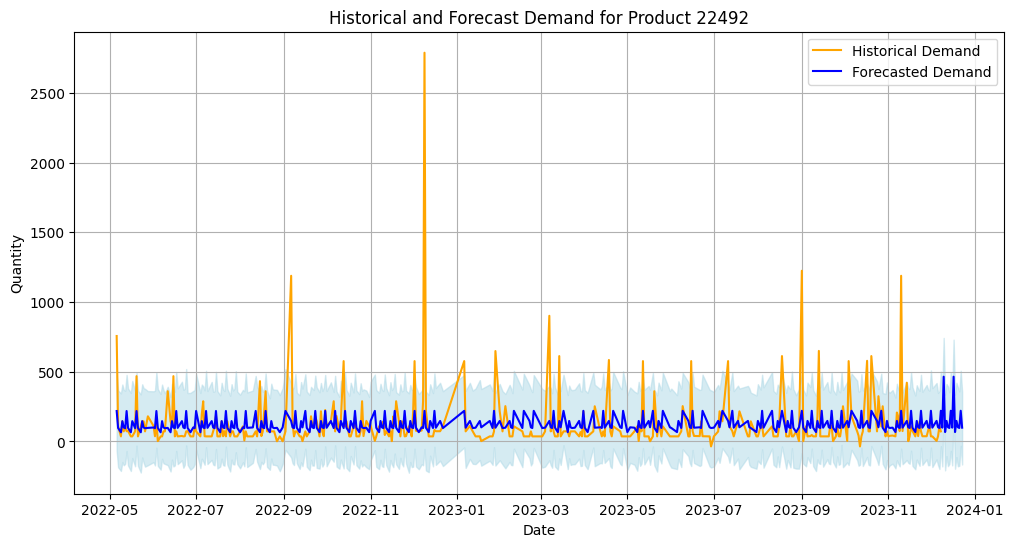

Mean Absolute Error (MAE): 106.10


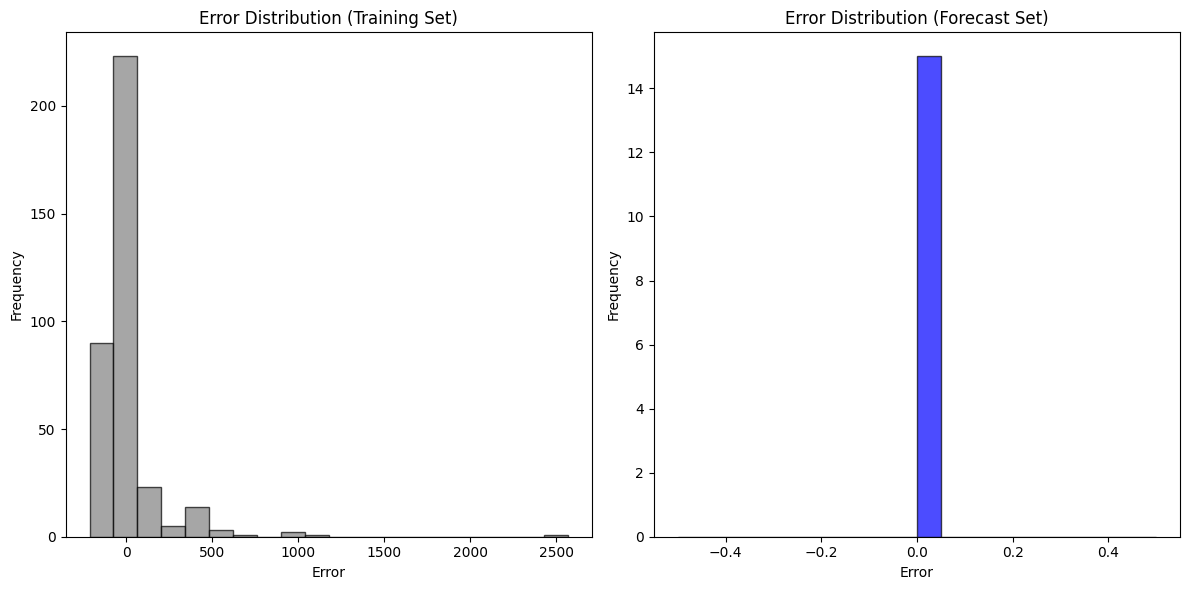

In [151]:
# Example usage: Loop through each of the top products to apply Prophet and plot ACF/PACF
for stock_code in top_products_by_quantity:
    apply_prophet_and_plot(df_grouped, stock_code)


## **Performing the NoN -TimeSeries Data**

### **Step 1: Prepare the Data**

In [152]:

# Load transactional data
df1 = pd.read_csv('Transactional_data_retail_01.csv')
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format='%d %B %Y')
df2 = pd.read_csv('Transactional_data_retail_02.csv')
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'], format='%d-%m-%Y')

# Combine transactional datasets
df_transactions = pd.concat([df1, df2])

# Load customer demographics and product info
customer_df = pd.read_csv('CustomerDemographics.csv')
product_df = pd.read_csv('ProductInfo.csv')


In [153]:
# Check the Daatframes
df_transactions.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01


In [154]:
customer_df.head()

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France


In [155]:
product_df.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [156]:
# Merge transactional data with customer demographics
merged_df = df_transactions.merge(customer_df, on='Customer ID', how='left')

# Merge with product info
merged_df = merged_df.merge(product_df, on='StockCode', how='left')


# Now 'merged_df' contains all relevant data
merged_df.head()


,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed."
3,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,NaN
4,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,WHITE CHERRY LIGHTS


In [157]:
merged_df.shape

(2115559, 8)

In [158]:
# Check for missing values
print(merged_df.isnull().sum())

Invoice              0
StockCode            0
Quantity             0
Price                0
Customer ID     456094
InvoiceDate          0
Country        2055929
Description     387589
dtype: int64


In [159]:
merged_df.dropna(inplace = True)
merged_df.head()


,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed."
4,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,WHITE CHERRY LIGHTS
5,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed."


In [160]:
print(merged_df.isnull().sum())

Invoice        0
StockCode      0
Quantity       0
Price          0
Customer ID    0
InvoiceDate    0
Country        0
Description    0
dtype: int64


In [161]:
merged_df.shape

(48048, 8)

### **Feature Engineering**

In [162]:
# Example: Create a 'TotalRevenue' feature
merged_df['TotalRevenue'] = merged_df['Quantity'] * merged_df['Price']

# Example: Extract date features from InvoiceDate
merged_df['InvoiceYear'] = merged_df['InvoiceDate'].dt.year
merged_df['InvoiceMonth'] = merged_df['InvoiceDate'].dt.month
merged_df['InvoiceDay'] = merged_df['InvoiceDate'].dt.day


In [163]:
## LAbel Encoding
from sklearn.preprocessing import LabelEncoder
# label encoders
le_country = LabelEncoder()
le_stockcode = LabelEncoder()

# Fit and transform the 'Country' column
merged_df['Country'] = le_country.fit_transform(merged_df['Country'])

# Fit and transform the 'StockCode' column
merged_df['StockCode'] = le_stockcode.fit_transform(merged_df['StockCode'])


In [164]:
# Sample of dataframe mearged_df
merged_df.sample(10)


,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Country,Description,TotalRevenue,InvoiceYear,InvoiceMonth,InvoiceDay
847046,528313,1510,1,16.95,13047.0,2022-10-21,5,"BREAD BIN, DINER STYLE, MINT",16.95,2022,10,21
1584062,558996,939,2,8.50,13085.0,2023-07-05,5,BLUE DINER WALL CLOCK,17.00,2023,7,5
276959,502089,1187,1,9.95,14307.0,2022-03-22,5,damages,9.95,2022,3,22
22970,490286,2161,4,2.55,14527.0,2021-12-04,5,TEA TIME DES TEA COSY,10.20,2021,12,4
1089736,536401,864,1,2.55,15862.0,2022-12-01,5,BIRD HOUSE HOT WATER BOTTLE,2.55,2022,12,1
435685,509456,1135,4,4.25,13047.0,2022-05-24,5,ENAMEL MEASURING JUG CREAM,17.00,2022,5,24
1827128,569722,761,5,2.95,12431.0,2023-10-06,0,RED RETROSPOT PICNIC BAG,14.75,2023,10,6
1851563,570797,16,2,5.95,15311.0,2023-10-12,5,EDWARDIAN PARASOL BLACK,11.90,2023,10,12
1084243,538012,426,1,4.95,14527.0,2022-12-09,5,HOME SMALL WOOD LETTERS,4.95,2022,12,9
1050012,536609,2289,6,2.10,17850.0,2022-12-02,5,WOODEN PICTURE FRAME WHITE FINISH,12.60,2022,12,2


In [165]:
merged_df['StockCode'].value_counts()

,count
StockCode,
2646,1115
1129,945
2631,632
2293,608
513,436
...,...
138,1
2724,1
2733,1


In [166]:
merged_df['Country'].value_counts()

,count
Country,
5,44158
2,2637
0,781
1,432
3,39
4,1


### **Define Features and Target Variable**

In [167]:
# Define features (X) and target variable (y)
X = merged_df.drop(columns=['Quantity', 'InvoiceDate', 'TotalRevenue', 'Description', 'Invoice'])
y = merged_df['Quantity']  # Target variable (demand)



In [168]:
# X features
X.sample(5)


,StockCode,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,InvoiceDay
46545,2268,5.45,15311.0,5,2021,12,9
59762,2711,4.95,14527.0,5,2021,12,14
1754696,1025,1.65,13408.0,5,2023,9,14
1936792,24,0.12,15311.0,5,2023,11,4
793550,1338,1.95,17920.0,5,2022,10,8


In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48048 entries, 0 to 2115272
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StockCode     48048 non-null  int64  
 1   Price         48048 non-null  float64
 2   Customer ID   48048 non-null  float64
 3   Country       48048 non-null  int64  
 4   InvoiceYear   48048 non-null  int32  
 5   InvoiceMonth  48048 non-null  int32  
 6   InvoiceDay    48048 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 2.4 MB


In [170]:
y.head()


,Quantity
0,12
1,12
2,12
4,12
5,12


### **Define Features (X) and Target Variable (y)**

In [171]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from xgboost import XGBRegressor



In [172]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train the model and evaluate its performance."""
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)

    # Calculate metrics for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    return mse_test, r2_test, mae_test, rmse_test



In [181]:
# Initialize models - using Random Forest and XGBoost
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# List to collect results
results_list = []


In [182]:

# Evaluate each model
for model_name, model in models.items():
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    # Append only evaluation metrics to the list
    results_list.append({
        'Model': model_name,
        'MSE_Test': metrics[0],
        'R²_Test': metrics[1],
        'MAE_Test': metrics[2],
        'RMSE_Test': metrics[3],
    })

In [183]:
# Initialize models - Only using Random Forest and XGBoost
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [184]:
# Create a DataFrame from the results list
results = pd.DataFrame(results_list)

# Display results
results

,Model,MSE_Test,R²_Test,MAE_Test,RMSE_Test
0,Random Forest,2767.370094,0.487376,6.827854,52.605799
1,XGBoost,2810.415020,0.479402,11.274210,53.013348


In [ ]:
### RandomForst is Perfomed Better than XGB For this Data

### **Hyperparameter Tuning with Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
